In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [11]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4446,6161-UUUTA,Male,1,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.90,260.9,Yes
6402,8510-TMWYB,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.80,3246.45,No
6740,7957-RYHQD,Female,1,No,No,40,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.20,3233.85,Yes
4112,6627-CFOSN,Female,0,No,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),99.45,5623.7,No
5698,0654-HMSHN,Male,0,Yes,Yes,21,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,104.40,2157.95,Yes


# Data Processing

In [12]:
df.drop(['customerID'], axis = 'columns', inplace = True)  # inplace: Make changes in DataFrame itself

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [15]:
df['TotalCharges'].values    # Not integer/float values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
pd.to_numeric(df['TotalCharges'])   # Problem --> conversion of empty spaces to numerical values

ValueError: Unable to parse string " " at position 488

In [17]:
# Fixing empty spaces
# Display all empty spaced data
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
# Remove these as they are less in number
df1 = df[df['TotalCharges'] != ' ']
df1.sample(5)  # --> with no empty values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3860,Male,0,No,Yes,19,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.35,566.1,No
6993,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,Yes
1005,Female,1,Yes,No,53,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),95.85,5016.25,No
4736,Female,0,Yes,Yes,56,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.4,No
4279,Male,0,Yes,Yes,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.40,546.85,No


In [19]:
df1.shape

(7032, 20)

In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
# TotalCharges --> object to numeric values conversion
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1.dtypes

/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/2381075598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df1['TotalCharges'].values   # Numeric values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [23]:
df1[df['Churn'] == "No"]

/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/4016856623.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df['Churn'] == "No"]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Data Visualisation

In [24]:
tenure_churn_no = df1[df1['Churn'] == 'No']['tenure']
tenure_churn_yes = df1[df1['Churn'] == 'Yes']['tenure']

In [25]:
tenure_churn_yes

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

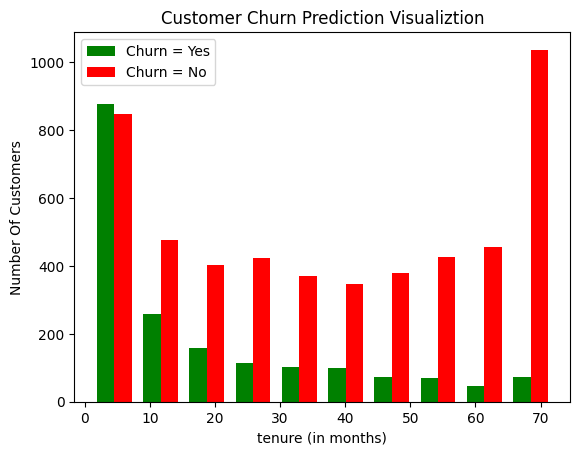

In [30]:
plt.xlabel("tenure (in months)")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth = 0.75, color = ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

# Data Cleaning

In [40]:
def unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f"{col} : {df[col].unique()}")

In [32]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [33]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/494651664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/494651664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [34]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', "DeviceProtection",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

In [36]:
# Replacing Yes & No --> 1 & 0
# Hot Encoding
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/898878189.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)
/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/898878189.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [39]:
unique_col_values(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [41]:
df1['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/2261156774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
/var/folders/cq/_gds89rn51xbvrwmwjfxqzh80000gn/T/ipykernel_15596/2261156774.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [42]:
df1['gender'].unique()

array([0, 1])

In [43]:
unique_col_values(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [45]:
# Hot Encoding for Data having non binary values
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [46]:
hot_encode_cols = ["InternetService", "Contract", "PaymentMethod"]

In [47]:
df2 = pd.get_dummies(data = df1, columns = hot_encode_cols)
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6913,0,0,1,1,69,1,1,0,1,1,...,False,True,False,False,True,False,True,False,False,False
443,0,0,0,1,18,1,1,1,0,0,...,True,False,False,True,False,False,False,False,True,False
5682,0,0,1,0,1,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
2261,0,0,1,0,49,1,1,0,0,0,...,True,False,False,True,False,False,False,True,False,False
2800,0,0,1,1,20,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [48]:
df2.shape

(7032, 27)

In [49]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

# Scaling Data

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [48]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
153,1,0,1,1,0.859155,1,0,1,1,1,...,True,False,False,False,False,True,False,False,True,False
453,0,0,1,1,0.380282,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3711,0,0,1,1,0.760563,1,1,1,1,0,...,True,False,False,False,True,False,True,False,False,False
6137,0,0,0,0,0.056338,1,0,1,0,0,...,True,False,False,True,False,False,False,True,False,False
1472,1,0,1,1,0.169014,1,1,0,0,0,...,False,True,False,True,False,False,False,True,False,False


In [53]:
unique_col_values(df2)

In [54]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

# Training Model

In [2]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
X_train.shape

(5625, 26)

In [58]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3015,1,0,1,1,0.816901,1,0,1,1,1,...,True,False,False,False,False,True,False,False,True,False
986,0,0,0,0,0.154930,1,0,0,0,0,...,True,False,False,True,False,False,True,False,False,False
557,1,0,0,0,0.521127,1,0,1,1,0,...,True,False,False,False,True,False,False,False,False,True
1645,0,1,0,0,0.577465,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1483,0,0,1,1,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,1,0,0,0,0.154930,1,1,0,0,0,...,False,False,True,True,False,False,False,False,True,False
1033,0,0,1,0,0.859155,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
4966,1,0,1,1,0.253521,1,1,0,0,0,...,True,False,False,True,False,False,False,True,False,False
5245,0,0,1,1,0.971831,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False


In [59]:
len(X_train.columns)

26

In [3]:
import tensorflow as tf
from tensorflow import keras

2024-07-19 19:35:54.781101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [61]:
model = keras.Sequential([
    keras.layers.Dense(units = 26, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [62]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [63]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6797 - loss: 0.5965
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7733 - loss: 0.4576
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7909 - loss: 0.4289
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7906 - loss: 0.4272
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: 0.4165
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.4254
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8001 - loss: 0.4242
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.4218
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8002 - loss: 0.4113
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4048


In [64]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 0.4176


[0.4184601604938507, 0.8002842664718628]

In [65]:
y_predicted = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [66]:
y_predicted[:5]

array([[0.02169154],
       [0.03549594],
       [0.19785482],
       [0.1911791 ],
       [0.7741342 ]], dtype=float32)

In [67]:
y_test[:5]

669     0
4040    0
1316    0
4249    0
1159    1
Name: Churn, dtype: int64

In [68]:
y_pred = []
for element in y_predicted:
    if element > 0.5: y_pred.append(1)
    else: y_pred.append(0)

In [69]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [75]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1045
           1       0.62      0.57      0.60       362

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



Text(95.72222222222221, 0.5, 'Truth')

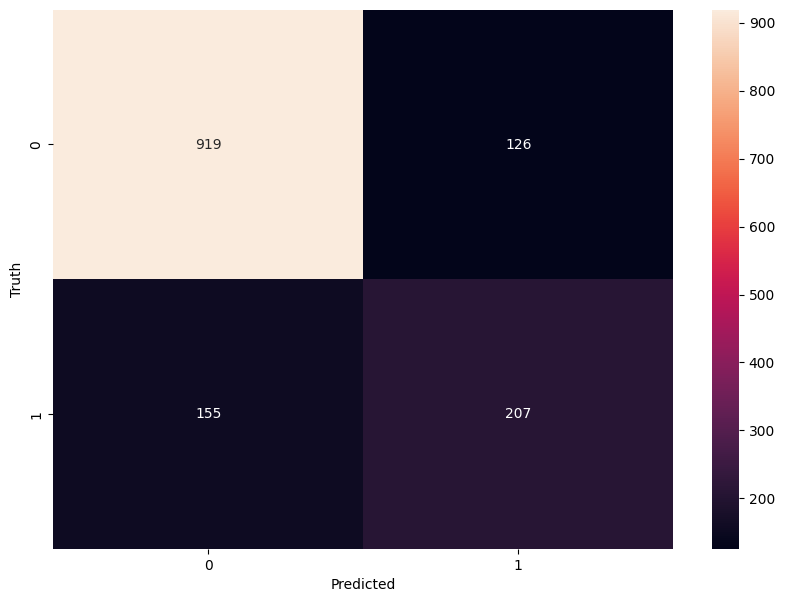

In [78]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [82]:
f"Model Accuracy based on Confusion Matrix: {((919 + 207) / (919 + 207 + 126 + 155)) * 100:.3f} %"

'Model Accuracy based on Confusion Matrix: 80.028 %'

In [84]:
# Precision For Prediction '0'
f"0 Precision: {(919 / (919 + 155)) * 100:.3f} %"

'0 Precision: 85.568 %'

In [86]:
# Precision For Prediction '1'
f"1 Precision: {(207 / (207 + 126)) * 100:.3f} %"

'1 Precision: 62.162 %'

In [87]:
# Recall for 0
f"Recall 0: {(919 / (919 + 126)) * 100:.3f} %"

'Recall 0: 87.943 %'

In [88]:
# Recall for 1
f"Recall 1: {(207 / (207 + 155)) * 100:.3f} %"

'Recall 1: 57.182 %'